In [1]:
import sys

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from antlia import lidar
from antlia import util

%load_ext autoreload
%autoreload 2

In [ ]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [2]:
def set_title(ax, title):
    try:
        mpld3
    except NameError:
        ax.figure.suptitle(title)
    else:
        ax.set_title(title)

In [3]:
DEFAULT_FIGSIZE = (14, 7)

In [4]:
records = lidar.load_records()
for r in records:
    print(r)

Unable to determine range 2
Unable to determine range 1


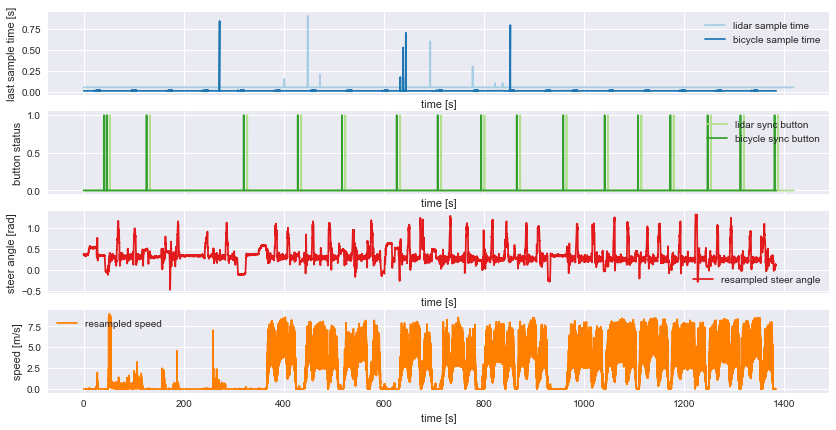

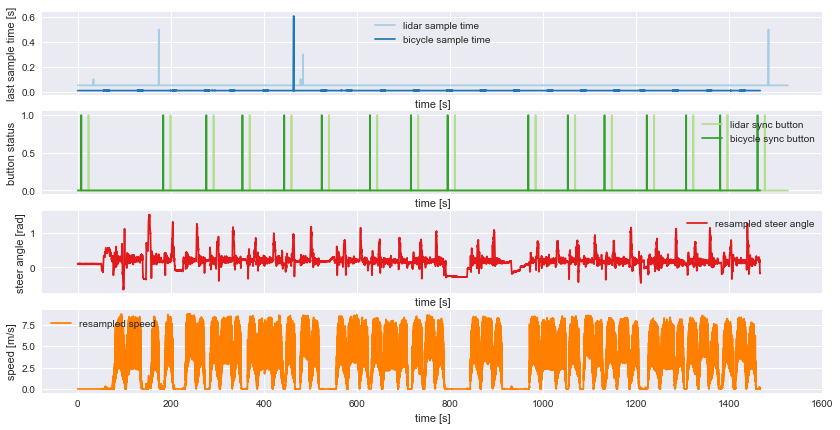

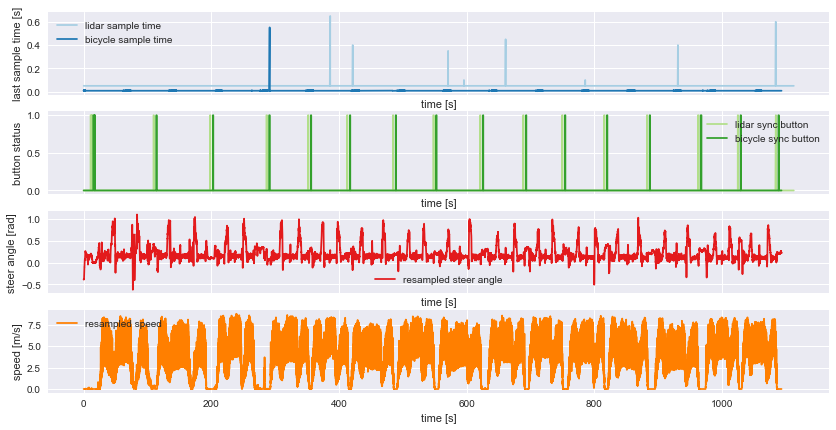

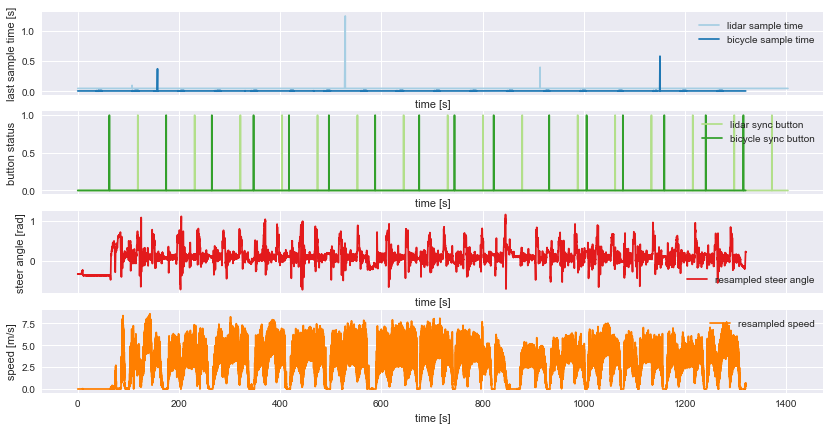

In [5]:
ax1 = [r.plot_timeseries(figsize=DEFAULT_FIGSIZE) for r in records]
plt.show()

synchronizing by applying time offset of 6.672 sec
synchronizing by applying time offset of 15.600 sec
synchronizing by applying time offset of -4.448 sec
synchronizing by applying time offset of 56.320 sec


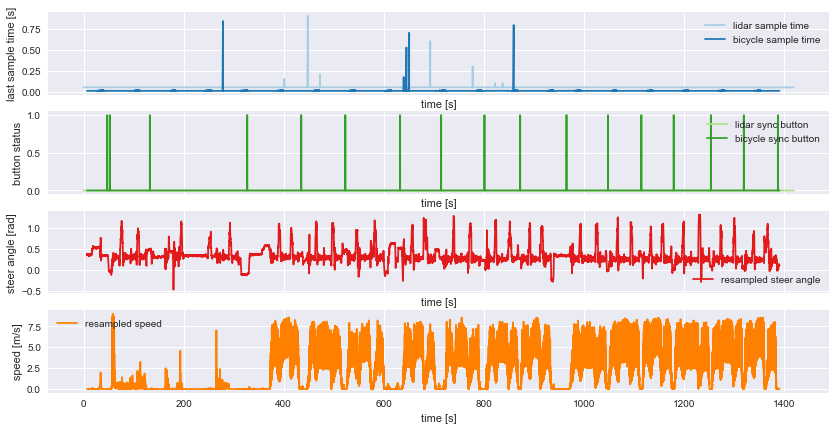

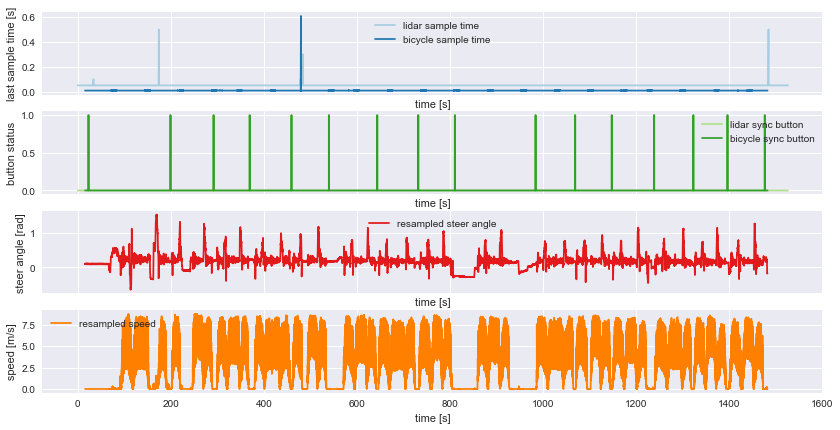

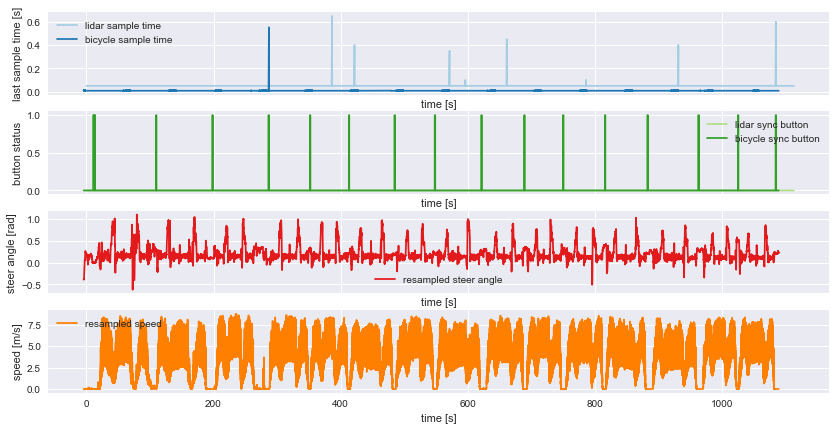

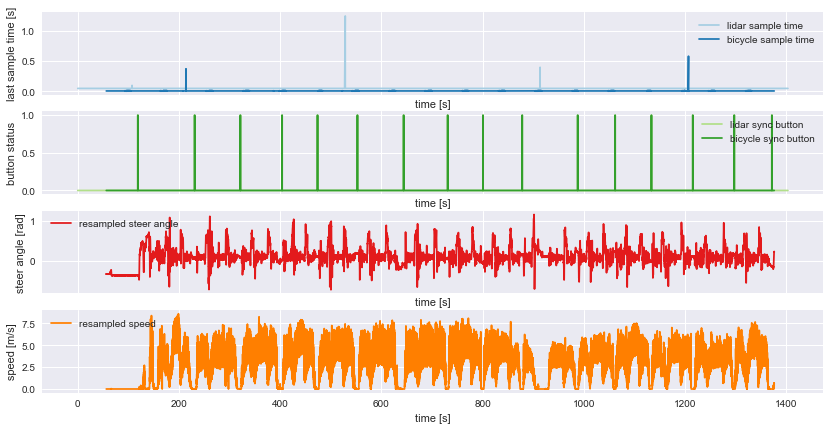

In [6]:
ax2 = []
for r in records:
    offset = r.sync()
    print('synchronizing by applying time offset of {:0.3f} sec'.format(offset))
    ax2.append(r.plot_timeseries(figsize=DEFAULT_FIGSIZE))
plt.show()

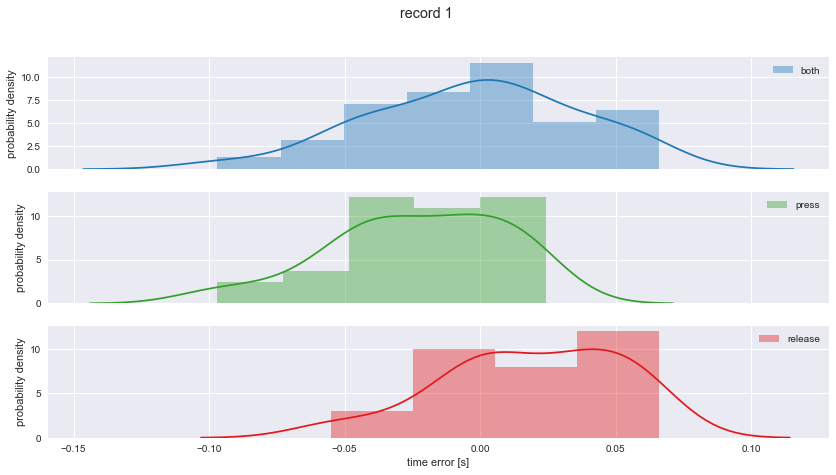

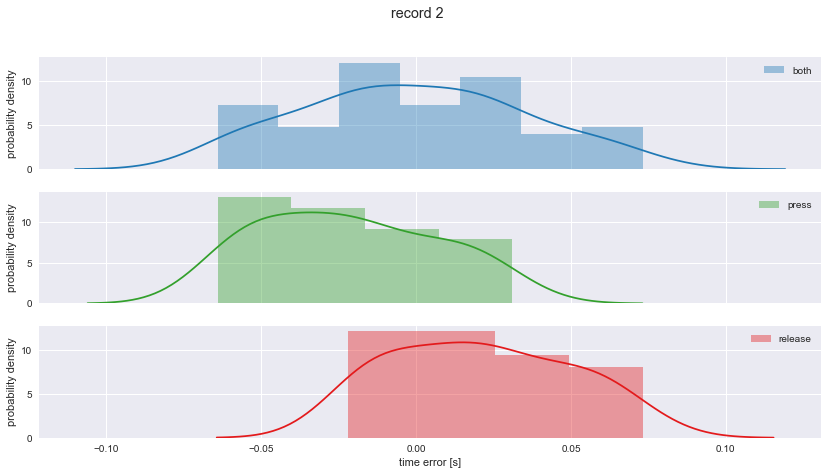

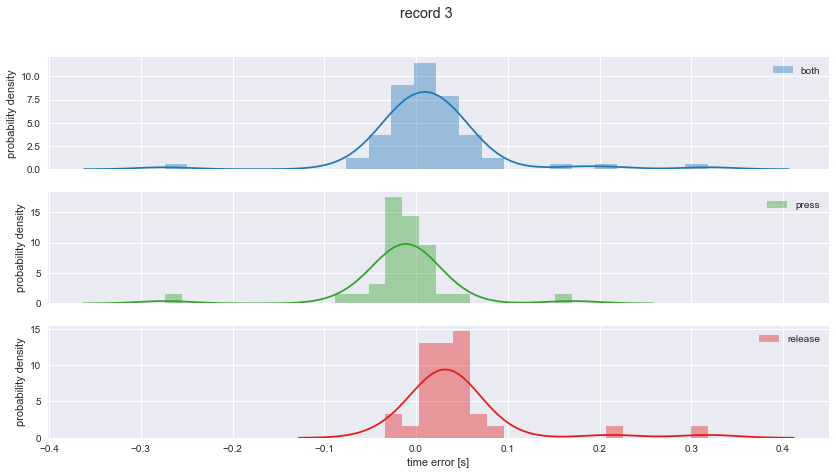

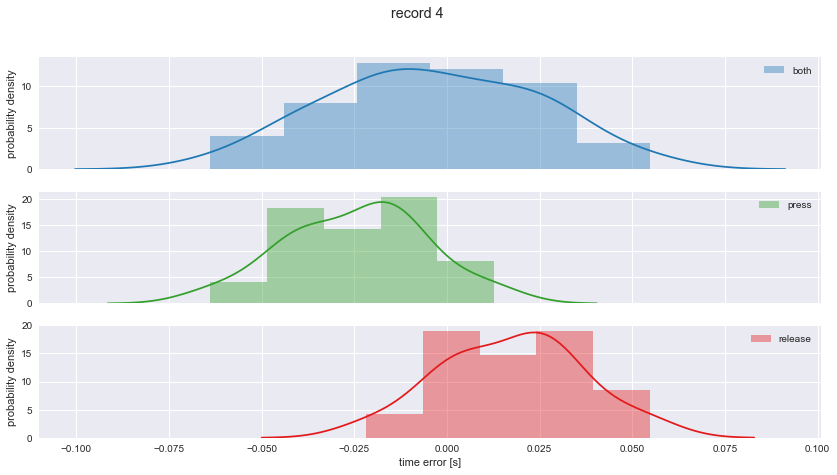

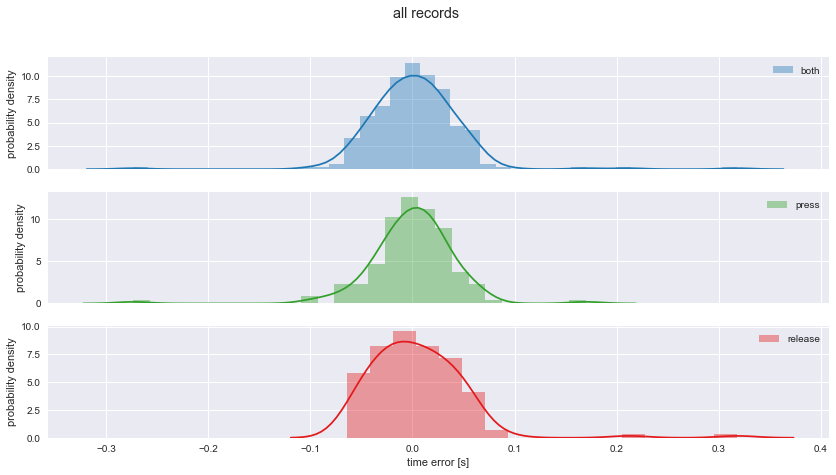

probability density of sync edge time error
lidar edge occuring before bicycle edge is a positive time error

stats:
nobs 260
minmax (-0.27387600000088241, 0.31812299999933202)
mean 0.00206855384597
variance 0.00212109613119
skewness 0.8838497327252869
kurtosis 13.769643983477899


In [7]:
def plot_edge_dt_dist(edge_dt, title=None, ax=None):
    press = edge_dt[0::2]
    release = edge_dt[1::2]
    
    if ax is None:
        fig, ax = plt.subplots(3, 1, sharex=True, figsize=DEFAULT_FIGSIZE)
        
    data = (edge_dt, press, release)
    colors = sns.color_palette('Paired', 10)[1::2]
    labels = ('both', 'press', 'release')
    
    for d, c, l, a in zip(data, colors, labels, ax):
        sns.distplot(d, color=c, label=l, ax=a)
    
    for a in ax:
        a.set_ylabel('probability density')
        a.legend()
    ax[-1].set_xlabel('time error [s]')
    
    if title is not None:
        set_title(ax[0], title)
        
    return ax

diff = []
for i, r in enumerate(records, 1):
    def edge_time(k):
        subrecord = getattr(r, k)
        _, index = util.reduce_runs(subrecord.sync)
        
        # Remove first and last elements correspond to
        # logging start and stop, not to sync edges.
        return subrecord.time[index[1:-2]]
    
    e = [edge_time(k) for k in lidar.Record.kinds]
    diff.append(e[0] - e[1])
    ax = plot_edge_dt_dist(diff[-1], 'record {}'.format(i))
    print()
    
all_diff = np.concatenate(diff)
ax = plot_edge_dt_dist(all_diff, 'all records')
plt.show()

print('probability density of sync edge time error')
print('lidar edge occuring before bicycle edge is a positive time error')

print('\nstats:')
for k, v in scipy.stats.describe(all_diff)._asdict().items():
    print(k, v)